In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from src.logger import init_logger
from src.builtin.estimators import TabNetClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## Init Logger

In [2]:
logger_dir = 'logs/demo'
logger_name = 'Classification'
level = 'INFO'

logger = init_logger(logger_dir=logger_dir, logger_name=logger_name, level=level)

## Load Data

In [3]:
X, y = load_breast_cancer(return_X_y=True)

print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=427)

(569, 30)
(569,)


In [4]:
X_test.shape

(188, 30)

## Modeling

In [5]:
tabnet = TabNetClassifier(
    input_dims=30, output_dims=[1], logger=logger, is_cuda=True,
    reprs_dims=8, atten_dims=4, num_steps=3, num_indep=1, num_shared=1, virtual_batch_size=32
)

### Build Network Architecture

In [6]:
tabnet.build(path=None)

[2021-01-30 16:26:49,672][WARNING][TabNet] Failed to load model from None


TabNetClassifier(atten_dims=4, input_dims=30, is_cuda=True,
                 logger=<RootLogger root (INFO)>, num_indep=1, num_shared=1,
                 output_dims=[1], virtual_batch_size=32)

### Fit Model

#### Set training params

In [7]:
from torch.optim import Adam
from torch.optim import lr_scheduler


training_params = {
    'batch_size': 128,
    'max_epochs': 200,
    'metrics': ['acc'],
    'optimizer': Adam,
    'optimizer_params': {'lr': 0.1},
    'schedulers': [lr_scheduler.ExponentialLR],
    'scheduler_params': {'gamma': 0.99}
}


In [8]:
tabnet.fit(X_train, y_train.reshape(-1, 1), valid_feats=X_test, valid_targets=y_test.reshape(-1, 1), **training_params)

[2021-01-30 16:26:49,697][INFO][TabNet] start training.
[2021-01-30 16:26:49,698][INFO][TabNet] ******************** epoch : 1 ********************
[2021-01-30 16:26:53,005][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:26:53,006][INFO][TabNet] total_loss : 0.742356926202774
[2021-01-30 16:26:53,006][INFO][TabNet] task_loss : 0.7412990629673004
[2021-01-30 16:26:53,007][INFO][TabNet] mask_loss : -1.0578711926937103
[2021-01-30 16:26:53,008][INFO][TabNet] time_cost : 0.9387707710266113
[2021-01-30 16:26:53,008][INFO][TabNet] accuracy : 0.57421875
[2021-01-30 16:26:55,418][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:26:55,419][INFO][TabNet] total_loss : 2.207000494003296
[2021-01-30 16:26:55,419][INFO][TabNet] task_loss : 2.206474781036377
[2021-01-30 16:26:55,420][INFO][TabNet] mask_loss : -0.5257154703140259
[2021-01-30 16:26:55,421][INFO][TabNet] time_cost : 0.0149688720703125
[2021-01-30 16:26:55,421][INFO][TabN

[2021-01-30 16:27:31,371][INFO][TabNet] time_cost : 0.0717461109161377
[2021-01-30 16:27:31,372][INFO][TabNet] accuracy : 0.90234375
[2021-01-30 16:27:33,761][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:27:33,762][INFO][TabNet] total_loss : 5.957630157470703
[2021-01-30 16:27:33,762][INFO][TabNet] task_loss : 5.9573869705200195
[2021-01-30 16:27:33,763][INFO][TabNet] mask_loss : -0.243244469165802
[2021-01-30 16:27:33,763][INFO][TabNet] time_cost : 0.014961481094360352
[2021-01-30 16:27:33,764][INFO][TabNet] accuracy : 0.390625
[2021-01-30 16:27:33,764][INFO][TabNet] ******************** epoch : 10 ********************
[2021-01-30 16:27:36,192][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:27:36,193][INFO][TabNet] total_loss : 0.30475781112909317
[2021-01-30 16:27:36,194][INFO][TabNet] task_loss : 0.3041605204343796
[2021-01-30 16:27:36,194][INFO][TabNet] mask_loss : -0.5972936451435089
[2021-01-30 16:27:36,195][I

[2021-01-30 16:28:12,331][INFO][TabNet] time_cost : 0.014986991882324219
[2021-01-30 16:28:12,332][INFO][TabNet] accuracy : 0.4609375
[2021-01-30 16:28:12,332][INFO][TabNet] ******************** epoch : 18 ********************
[2021-01-30 16:28:14,787][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:28:14,788][INFO][TabNet] total_loss : 0.17103972285985947
[2021-01-30 16:28:14,788][INFO][TabNet] task_loss : 0.17059536278247833
[2021-01-30 16:28:14,789][INFO][TabNet] mask_loss : -0.44436535239219666
[2021-01-30 16:28:14,790][INFO][TabNet] time_cost : 0.07180213928222656
[2021-01-30 16:28:14,790][INFO][TabNet] accuracy : 0.91015625
[2021-01-30 16:28:17,155][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:28:17,155][INFO][TabNet] total_loss : 1.341568112373352
[2021-01-30 16:28:17,156][INFO][TabNet] task_loss : 1.340994119644165
[2021-01-30 16:28:17,156][INFO][TabNet] mask_loss : -0.5740385055541992
[2021-01-30 16:28:17,15

[2021-01-30 16:28:53,978][INFO][TabNet] task_loss : 0.11567371338605881
[2021-01-30 16:28:53,979][INFO][TabNet] mask_loss : -0.39428994059562683
[2021-01-30 16:28:53,979][INFO][TabNet] time_cost : 0.07081794738769531
[2021-01-30 16:28:53,980][INFO][TabNet] accuracy : 0.9609375
[2021-01-30 16:28:56,440][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:28:56,441][INFO][TabNet] total_loss : 0.4911706745624542
[2021-01-30 16:28:56,442][INFO][TabNet] task_loss : 0.4906902313232422
[2021-01-30 16:28:56,442][INFO][TabNet] mask_loss : -0.4804454743862152
[2021-01-30 16:28:56,443][INFO][TabNet] time_cost : 0.012992382049560547
[2021-01-30 16:28:56,443][INFO][TabNet] accuracy : 0.7265625
[2021-01-30 16:28:56,444][INFO][TabNet] ******************** epoch : 27 ********************
[2021-01-30 16:28:58,910][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:28:58,911][INFO][TabNet] total_loss : 0.12332244589924812
[2021-01-30 16:28:58,9

[2021-01-30 16:29:35,148][INFO][TabNet] task_loss : 0.2373388111591339
[2021-01-30 16:29:35,149][INFO][TabNet] mask_loss : -0.3744562864303589
[2021-01-30 16:29:35,149][INFO][TabNet] time_cost : 0.014933109283447266
[2021-01-30 16:29:35,150][INFO][TabNet] accuracy : 0.8984375
[2021-01-30 16:29:35,150][INFO][TabNet] ******************** epoch : 35 ********************
[2021-01-30 16:29:37,617][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:29:37,618][INFO][TabNet] total_loss : 0.09324530512094498
[2021-01-30 16:29:37,619][INFO][TabNet] task_loss : 0.09289727360010147
[2021-01-30 16:29:37,619][INFO][TabNet] mask_loss : -0.34803302586078644
[2021-01-30 16:29:37,620][INFO][TabNet] time_cost : 0.0714120864868164
[2021-01-30 16:29:37,620][INFO][TabNet] accuracy : 0.96875
[2021-01-30 16:29:40,038][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:29:40,039][INFO][TabNet] total_loss : 0.2757696211338043
[2021-01-30 16:29:40,039]

[2021-01-30 16:30:17,237][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:30:17,238][INFO][TabNet] total_loss : 0.17611070722341537
[2021-01-30 16:30:17,238][INFO][TabNet] task_loss : 0.17575696855783463
[2021-01-30 16:30:17,239][INFO][TabNet] mask_loss : -0.3537394255399704
[2021-01-30 16:30:17,239][INFO][TabNet] time_cost : 0.07519197463989258
[2021-01-30 16:30:17,240][INFO][TabNet] accuracy : 0.921875
[2021-01-30 16:30:19,640][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:30:19,641][INFO][TabNet] total_loss : 0.16786342859268188
[2021-01-30 16:30:19,641][INFO][TabNet] task_loss : 0.1675611287355423
[2021-01-30 16:30:19,642][INFO][TabNet] mask_loss : -0.3023030161857605
[2021-01-30 16:30:19,643][INFO][TabNet] time_cost : 0.010001182556152344
[2021-01-30 16:30:19,643][INFO][TabNet] accuracy : 0.9296875
[2021-01-30 16:30:19,644][INFO][TabNet] ******************** epoch : 44 ********************
[2021-01-30 16:30:22,12

[2021-01-30 16:30:55,722][INFO][TabNet] accuracy : 0.96484375
[2021-01-30 16:30:58,091][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:30:58,092][INFO][TabNet] total_loss : 0.18570426106452942
[2021-01-30 16:30:58,092][INFO][TabNet] task_loss : 0.18540829420089722
[2021-01-30 16:30:58,093][INFO][TabNet] mask_loss : -0.2959664463996887
[2021-01-30 16:30:58,093][INFO][TabNet] time_cost : 0.009940385818481445
[2021-01-30 16:30:58,094][INFO][TabNet] accuracy : 0.9296875
[2021-01-30 16:30:58,094][INFO][TabNet] ******************** epoch : 52 ********************
[2021-01-30 16:31:00,548][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:31:00,549][INFO][TabNet] total_loss : 0.0821942649781704
[2021-01-30 16:31:00,550][INFO][TabNet] task_loss : 0.08187398687005043
[2021-01-30 16:31:00,550][INFO][TabNet] mask_loss : -0.32027702033519745
[2021-01-30 16:31:00,551][INFO][TabNet] time_cost : 0.07432198524475098
[2021-01-30 16:31:00

[2021-01-30 16:31:36,823][INFO][TabNet] time_cost : 0.010969400405883789
[2021-01-30 16:31:36,824][INFO][TabNet] accuracy : 0.9375
[2021-01-30 16:31:36,824][INFO][TabNet] ******************** epoch : 60 ********************
[2021-01-30 16:31:39,249][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:31:39,250][INFO][TabNet] total_loss : 0.09923192858695984
[2021-01-30 16:31:39,251][INFO][TabNet] task_loss : 0.09895457327365875
[2021-01-30 16:31:39,251][INFO][TabNet] mask_loss : -0.27735456824302673
[2021-01-30 16:31:39,252][INFO][TabNet] time_cost : 0.06983757019042969
[2021-01-30 16:31:39,252][INFO][TabNet] accuracy : 0.96875
[2021-01-30 16:31:41,622][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:31:41,623][INFO][TabNet] total_loss : 0.2053152471780777
[2021-01-30 16:31:41,623][INFO][TabNet] task_loss : 0.2050681710243225
[2021-01-30 16:31:41,624][INFO][TabNet] mask_loss : -0.24707087874412537
[2021-01-30 16:31:41,624][

[2021-01-30 16:32:17,518][INFO][TabNet] task_loss : 0.09272150322794914
[2021-01-30 16:32:17,519][INFO][TabNet] mask_loss : -0.35065679252147675
[2021-01-30 16:32:17,519][INFO][TabNet] time_cost : 0.07082438468933105
[2021-01-30 16:32:17,520][INFO][TabNet] accuracy : 0.94921875
[2021-01-30 16:32:19,868][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:32:19,868][INFO][TabNet] total_loss : 0.18806450068950653
[2021-01-30 16:32:19,869][INFO][TabNet] task_loss : 0.18776875734329224
[2021-01-30 16:32:19,870][INFO][TabNet] mask_loss : -0.29573795199394226
[2021-01-30 16:32:19,870][INFO][TabNet] time_cost : 0.014956951141357422
[2021-01-30 16:32:19,871][INFO][TabNet] accuracy : 0.9453125
[2021-01-30 16:32:19,871][INFO][TabNet] ******************** epoch : 69 ********************
[2021-01-30 16:32:22,275][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:32:22,275][INFO][TabNet] total_loss : 0.09939172863960266
[2021-01-30 16:32:

[2021-01-30 16:32:58,228][INFO][TabNet] total_loss : 0.17462149262428284
[2021-01-30 16:32:58,228][INFO][TabNet] task_loss : 0.17424219846725464
[2021-01-30 16:32:58,229][INFO][TabNet] mask_loss : -0.37929123640060425
[2021-01-30 16:32:58,229][INFO][TabNet] time_cost : 0.01498723030090332
[2021-01-30 16:32:58,230][INFO][TabNet] accuracy : 0.9453125
[2021-01-30 16:32:58,230][INFO][TabNet] ******************** epoch : 77 ********************
[2021-01-30 16:33:00,689][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:33:00,689][INFO][TabNet] total_loss : 0.10404988378286362
[2021-01-30 16:33:00,690][INFO][TabNet] task_loss : 0.10370122641324997
[2021-01-30 16:33:00,690][INFO][TabNet] mask_loss : -0.34865841269493103
[2021-01-30 16:33:00,691][INFO][TabNet] time_cost : 0.06983375549316406
[2021-01-30 16:33:00,691][INFO][TabNet] accuracy : 0.96484375
[2021-01-30 16:33:03,142][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:33:0

[2021-01-30 16:33:40,141][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:33:40,142][INFO][TabNet] total_loss : 0.13193154707551003
[2021-01-30 16:33:40,142][INFO][TabNet] task_loss : 0.1316426694393158
[2021-01-30 16:33:40,143][INFO][TabNet] mask_loss : -0.28887954354286194
[2021-01-30 16:33:40,143][INFO][TabNet] time_cost : 0.0708012580871582
[2021-01-30 16:33:40,144][INFO][TabNet] accuracy : 0.9609375
[2021-01-30 16:33:42,511][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:33:42,512][INFO][TabNet] total_loss : 0.1297798752784729
[2021-01-30 16:33:42,512][INFO][TabNet] task_loss : 0.1294809877872467
[2021-01-30 16:33:42,513][INFO][TabNet] mask_loss : -0.298883855342865
[2021-01-30 16:33:42,514][INFO][TabNet] time_cost : 0.014958858489990234
[2021-01-30 16:33:42,514][INFO][TabNet] accuracy : 0.953125
[2021-01-30 16:33:42,515][INFO][TabNet] ******************** epoch : 86 ********************
[2021-01-30 16:33:44,940][

[2021-01-30 16:34:19,282][INFO][TabNet] accuracy : 0.95703125
[2021-01-30 16:34:21,698][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:34:21,699][INFO][TabNet] total_loss : 0.20478463172912598
[2021-01-30 16:34:21,700][INFO][TabNet] task_loss : 0.20448043942451477
[2021-01-30 16:34:21,700][INFO][TabNet] mask_loss : -0.30418866872787476
[2021-01-30 16:34:21,701][INFO][TabNet] time_cost : 0.010997533798217773
[2021-01-30 16:34:21,701][INFO][TabNet] accuracy : 0.9375
[2021-01-30 16:34:21,702][INFO][TabNet] ******************** epoch : 94 ********************
[2021-01-30 16:34:24,158][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:34:24,159][INFO][TabNet] total_loss : 0.0766860879957676
[2021-01-30 16:34:24,160][INFO][TabNet] task_loss : 0.07636117562651634
[2021-01-30 16:34:24,161][INFO][TabNet] mask_loss : -0.32491347193717957
[2021-01-30 16:34:24,162][INFO][TabNet] time_cost : 0.07135295867919922
[2021-01-30 16:34:24,1

[2021-01-30 16:35:00,774][INFO][TabNet] accuracy : 0.9375
[2021-01-30 16:35:00,774][INFO][TabNet] ******************** epoch : 102 ********************
[2021-01-30 16:35:03,235][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:35:03,236][INFO][TabNet] total_loss : 0.07893217727541924
[2021-01-30 16:35:03,237][INFO][TabNet] task_loss : 0.07856953516602516
[2021-01-30 16:35:03,237][INFO][TabNet] mask_loss : -0.36263981461524963
[2021-01-30 16:35:03,238][INFO][TabNet] time_cost : 0.07183694839477539
[2021-01-30 16:35:03,238][INFO][TabNet] accuracy : 0.9765625
[2021-01-30 16:35:05,627][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:35:05,628][INFO][TabNet] total_loss : 0.18627183139324188
[2021-01-30 16:35:05,629][INFO][TabNet] task_loss : 0.18590465188026428
[2021-01-30 16:35:05,629][INFO][TabNet] mask_loss : -0.3671801686286926
[2021-01-30 16:35:05,630][INFO][TabNet] time_cost : 0.01495981216430664
[2021-01-30 16:35:05,63

[2021-01-30 16:35:42,353][INFO][TabNet] mask_loss : -0.31899408996105194
[2021-01-30 16:35:42,353][INFO][TabNet] time_cost : 0.07204461097717285
[2021-01-30 16:35:42,354][INFO][TabNet] accuracy : 0.9609375
[2021-01-30 16:35:44,757][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:35:44,758][INFO][TabNet] total_loss : 0.20886357128620148
[2021-01-30 16:35:44,758][INFO][TabNet] task_loss : 0.20851179957389832
[2021-01-30 16:35:44,759][INFO][TabNet] mask_loss : -0.3517676293849945
[2021-01-30 16:35:44,760][INFO][TabNet] time_cost : 0.01197052001953125
[2021-01-30 16:35:44,760][INFO][TabNet] accuracy : 0.9453125
[2021-01-30 16:35:44,760][INFO][TabNet] ******************** epoch : 111 ********************
[2021-01-30 16:35:47,228][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:35:47,229][INFO][TabNet] total_loss : 0.08097224310040474
[2021-01-30 16:35:47,230][INFO][TabNet] task_loss : 0.08065247163176537
[2021-01-30 16:35:47

[2021-01-30 16:36:23,946][INFO][TabNet] task_loss : 0.19256699085235596
[2021-01-30 16:36:23,947][INFO][TabNet] mask_loss : -0.3509993255138397
[2021-01-30 16:36:23,947][INFO][TabNet] time_cost : 0.014960765838623047
[2021-01-30 16:36:23,948][INFO][TabNet] accuracy : 0.9375
[2021-01-30 16:36:23,948][INFO][TabNet] ******************** epoch : 119 ********************
[2021-01-30 16:36:26,434][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:36:26,435][INFO][TabNet] total_loss : 0.06535311974585056
[2021-01-30 16:36:26,436][INFO][TabNet] task_loss : 0.06503520160913467
[2021-01-30 16:36:26,436][INFO][TabNet] mask_loss : -0.3179181218147278
[2021-01-30 16:36:26,437][INFO][TabNet] time_cost : 0.08380293846130371
[2021-01-30 16:36:26,437][INFO][TabNet] accuracy : 0.9765625
[2021-01-30 16:36:28,835][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:36:28,836][INFO][TabNet] total_loss : 0.1602891981601715
[2021-01-30 16:36:28,836

[2021-01-30 16:37:05,484][INFO][TabNet] -------------------- train info --------------------
[2021-01-30 16:37:05,485][INFO][TabNet] total_loss : 0.08477039635181427
[2021-01-30 16:37:05,486][INFO][TabNet] task_loss : 0.08443331718444824
[2021-01-30 16:37:05,486][INFO][TabNet] mask_loss : -0.33708029985427856
[2021-01-30 16:37:05,487][INFO][TabNet] time_cost : 0.07386589050292969
[2021-01-30 16:37:05,487][INFO][TabNet] accuracy : 0.96484375
[2021-01-30 16:37:07,890][INFO][TabNet] -------------------- eval info --------------------
[2021-01-30 16:37:07,891][INFO][TabNet] total_loss : 0.11650311201810837
[2021-01-30 16:37:07,892][INFO][TabNet] task_loss : 0.1161118671298027
[2021-01-30 16:37:07,892][INFO][TabNet] mask_loss : -0.3912453055381775
[2021-01-30 16:37:07,892][INFO][TabNet] time_cost : 0.01595449447631836
[2021-01-30 16:37:07,894][INFO][TabNet] accuracy : 0.9609375
[2021-01-30 16:37:07,894][INFO][TabNet] ******************** epoch : 128 ********************
[2021-01-30 16:37:10

[2021-01-30 16:37:44,584][INFO][TabNet] accuracy : 0.9765625


KeyboardInterrupt: 

In [9]:
importance, masks = tabnet.explain(X)

In [10]:
feature_names = [
    'mean radius',
     'mean texture',
     'mean perimeter',
     'mean area',
     'mean smoothness',
     'mean compactness',
     'mean concavity',
     'mean concave points',
     'mean symmetry',
     'mean fractal dimension',
     'radius error',
     'texture error',
     'perimeter error',
     'area error',
     'smoothness error',
     'compactness error',
     'concavity error',
     'concave points error',
     'symmetry error',
     'fractal dimension error',
     'worst radius',
     'worst texture',
     'worst perimeter',
     'worst area',
     'worst smoothness',
     'worst compactness',
     'worst concavity',
     'worst concave points',
     'worst symmetry',
     'worst fractal dimension'
]
len(feature_names)

30

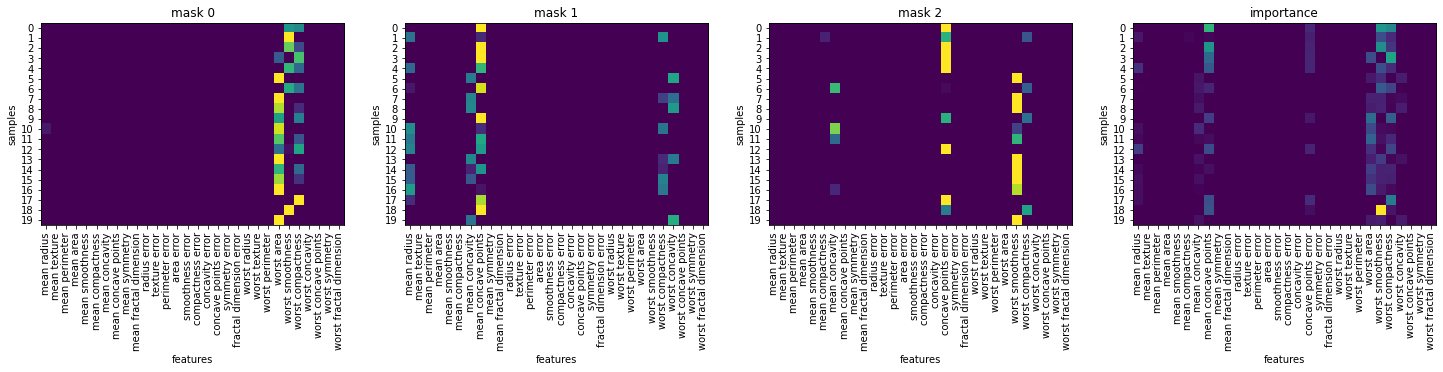

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(25,25))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
    axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
    axs[i].set_xticks(range(30))
    axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()

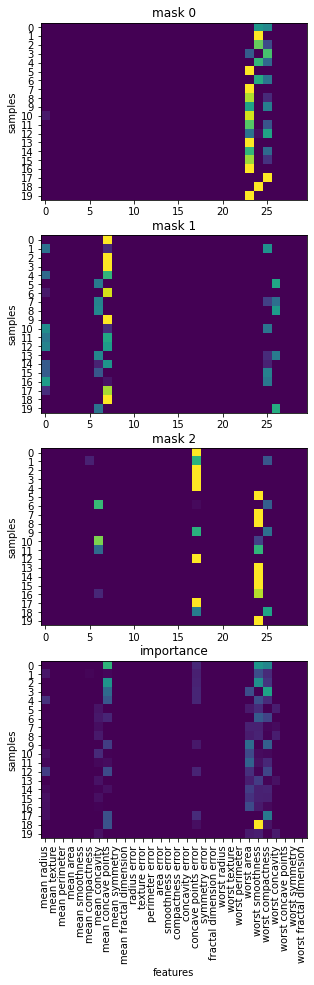

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(5,15))

for i in range(3):
    axs[i].imshow(masks[i].cpu().numpy()[:20])
#     axs[i].set_xlabel('features')
    axs[i].set_ylabel('samples')
    axs[i].set_title(f"mask {i}")
    axs[i].set_yticks(range(20))
#     axs[i].set_xticks(range(30))
#     axs[i].set_xticklabels(feature_names, rotation=90)

axs[3].imshow(importance.cpu().numpy()[:20, :])
axs[3].set_xlabel('features')
axs[3].set_ylabel('samples')
axs[3].set_title('importance')
axs[3].set_yticks(range(20))
axs[3].set_xticks(range(30))
axs[3].set_xticklabels(feature_names, rotation=90)
plt.show()

In [ ]:
data = load_breast_cancer(return_X_y=False)

In [ ]:
data.keys()

In [ ]:
data.feature_names.tolist()

In [15]:
import torch
import torch.nn  as nn

In [16]:
class Loss(nn.Module):
    """
    Base class as a wrapper for loss modules in this repo. 
    """
    def __init__(self):
        super(Loss, self).__init__()
        self._loss_func = None
    
    def forward(self, x, **kwargs):
        return self._loss_func(x, **kwargs)

In [17]:

class MSELoss(Loss):
    def __init__(self):
        super(MSELoss, self).__init__()
        self._loss_func = torch.nn.MSELoss()

In [18]:
A = MSELoss()

In [19]:
A.cuda()

MSELoss(
  (_loss_func): MSELoss()
)

In [4]:
def A(a, b, c, **kwargs):
    return a + b + c

params = {
    'a': 1, 'b': 2, 'c':3, 'd':10
}

A(**params)

6